# 1. Preparación de los datos

# 1.1. Examinar los datos

In [1]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Cargar los datasets
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')


# df_train

In [2]:
# Mostrar información general
print("Train dataset:")
print(df_train.info(), "\n")

Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non

In [3]:
# Mostrar las primeras filas
print("Primeras filas del conjunto de entrenamiento:")
print(df_train.head(), "\n")

Primeras filas del conjunto de entrenamiento:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2

# df_test

In [4]:
print("Test dataset:")
print(df_test.info(), "\n")

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10

In [5]:
print("Primeras filas del conjunto de prueba:")
print(df_test.head(), "\n")

Primeras filas del conjunto de prueba:
                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.9904

# df_full

In [6]:
print("Full dataset:")
print(df_full.info(), "\n")

Full dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-

In [7]:
print("Primeras filas del conjunto completo:")
print(df_full.head(), "\n")

Primeras filas del conjunto completo:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2        

In [8]:
print("Primeras filas del conjunto completo:")
print(df_full.tail(), "\n")

Primeras filas del conjunto completo:
                      date  final.output.concentrate_ag  \
22711  2018-08-18 06:59:59                     3.224920   
22712  2018-08-18 07:59:59                     3.195978   
22713  2018-08-18 08:59:59                     3.109998   
22714  2018-08-18 09:59:59                     3.367241   
22715  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
22711                    11.356233                      6.803482   
22712                    11.349355                      6.862249   
22713                    11.434366                      6.886013   
22714                    11.625587                      6.799433   
22715                    11.737832                      6.717509   

       final.output.concentrate_au  final.output.recovery  \
22711                    46.713954              73.755150   
22712                    46.866780              69.049291   
22713          

# 1.2. Recovery

In [9]:
def calculate_recovery(c,f,t):
    recovery = ((c*(f-t))/(f*(c-t)))*100
    return recovery

In [10]:
# Calcular la recuperación para rougher.output.recovery
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']
df_train['rougher.output.recovery_calculate'] = calculate_recovery(c,f,t)

In [11]:
print(df_train['rougher.output.recovery_calculate'].isna().sum())
print(df_train['rougher.output.recovery'].isna().sum())
both_na = df_train[['rougher.output.recovery', 'rougher.output.recovery_calculate']].isna().all(axis=1).sum()
print(both_na)

2283
2573
2283


In [12]:
# Calcular eam 
real_recovery = df_train['rougher.output.recovery']
calculate_recovery = df_train['rougher.output.recovery_calculate']

eam = abs(real_recovery - calculate_recovery).mean()
print('El EAM para rougher.output.recovery es:', eam)

El EAM para rougher.output.recovery es: 9.303415616264301e-15


El EAM es muy bajo, casi 0, por lo que el cálculo de recovery se hizo correctamente

# 1.3. Analiza las características no disponibles en el conjunto de prueba

In [13]:
columnas_full = df_full.columns.values
columnas_test = df_test.columns.values

missed_columns = set(columnas_full) - set(columnas_test)
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Estas características son de tipo Output, lo que significa que en el conjunto de prueba todavía no existen porque se obtienen después de realizar el proceso de purificación.

# 1.4. Preprocesamiento de datos

# df_train

In [14]:
missing_train = df_train.isnull().sum()
missing_train

date                                             0
final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
rougher.output.recovery_calculate             2283
Length: 88, dtype: int64

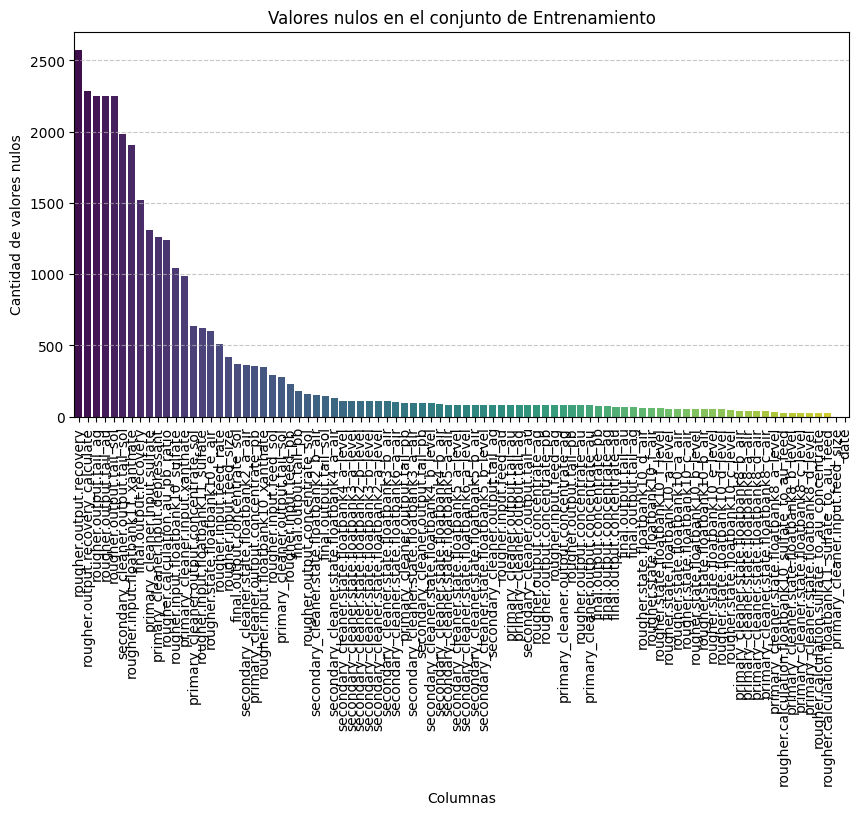

In [15]:
# Función para graficar valores nulos
def plot_missing_values(missing_data, title):
    missing_data = missing_data.sort_values(ascending=False)  
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
    plt.title(title)
    plt.xlabel("Columnas")
    plt.ylabel("Cantidad de valores nulos")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
plot_missing_values(missing_train, "Valores nulos en el conjunto de Entrenamiento")

In [16]:
print(2550/16860*100)
print(2250/16860*100)

15.12455516014235
13.345195729537366


# df_test

In [17]:
missing_test = df_test.isnull().sum()
missing_test

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


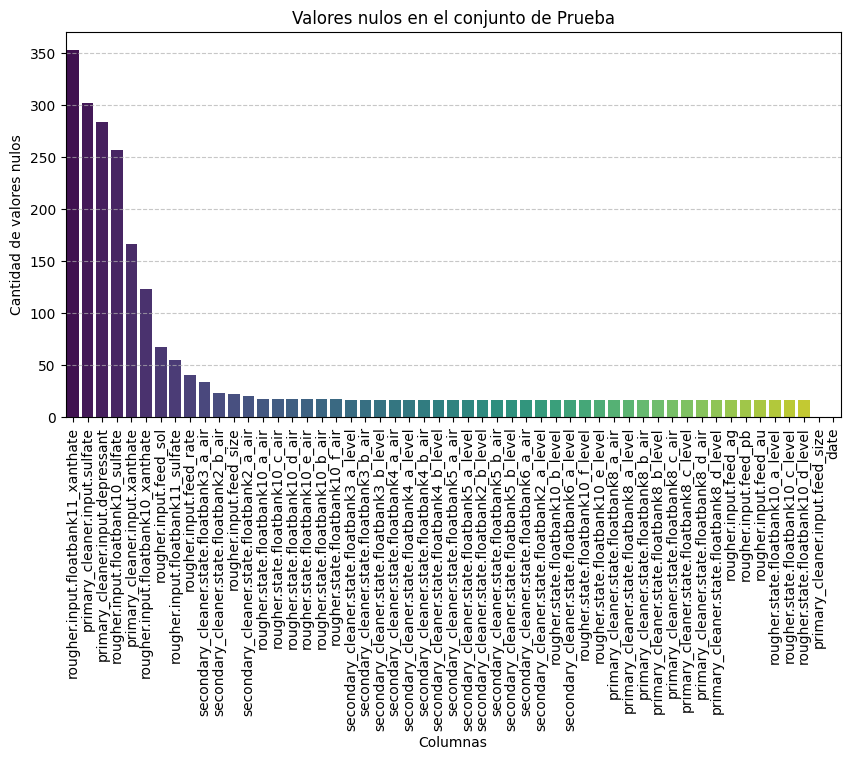

In [18]:
# Gráfica de valores nulos
plot_missing_values(missing_test, "Valores nulos en el conjunto de Prueba")

In [19]:
print(350/5856*100)
print(300/5856*100)

5.976775956284152
5.122950819672131


# df_full

In [20]:
missing_full = df_full.isnull().sum()
missing_full

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

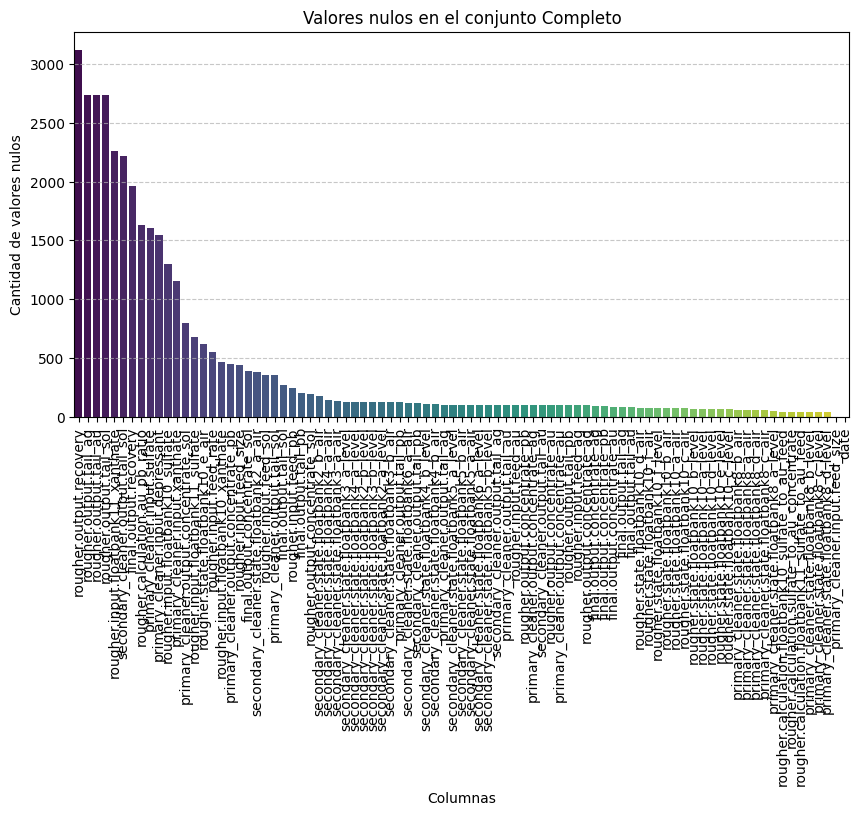

In [21]:
# Gráfica de valores nulos
plot_missing_values(missing_full, "Valores nulos en el conjunto Completo")

In [22]:
print(3100/22716*100)
print(2750/22716*100)

13.646768797323471
12.106004578270822


In [23]:
# Rellenando valores ausentes
df_train.fillna(method='ffill',inplace=True)
df_test.fillna(method='ffill',inplace=True)
df_full.fillna(method='ffill',inplace=True)

# Mostrando los NaN
display(df_test.isna().sum())
display(df_train.isna().sum())
display(df_full.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher.output.recovery_calculate             0
Length: 88, dtype: int64

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

# 2. Análisis de los datos

# 2.1. Cambio en la concentración de metales (Au, Ag y Pb) en función de la etapa de purificación

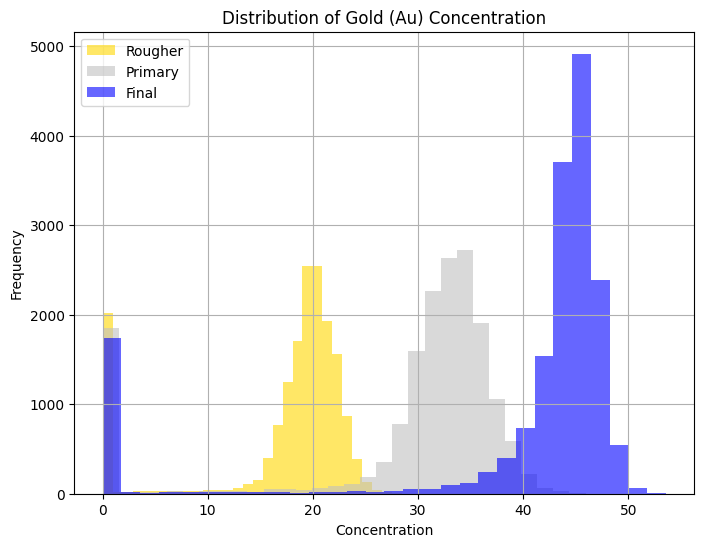

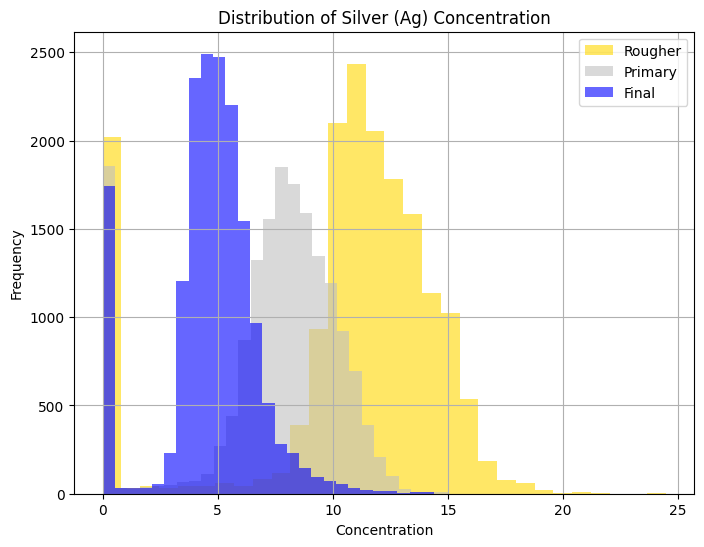

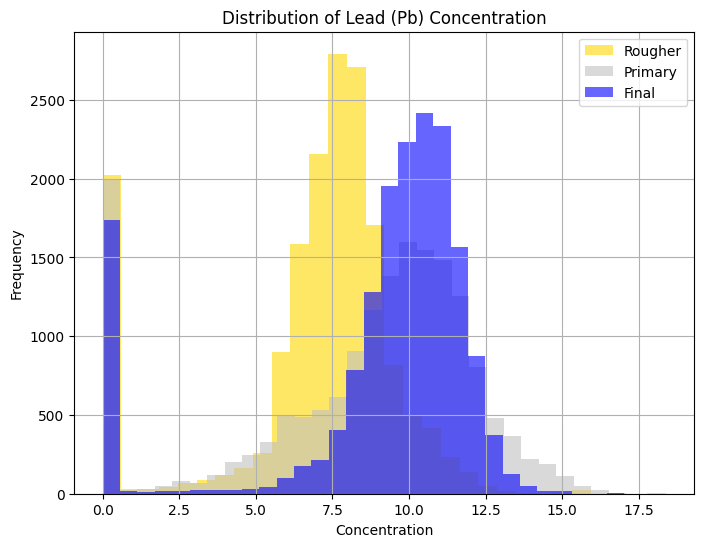

In [24]:
# Diccionario con los metales y sus columnas correspondientes
metals = {
    'Gold (Au)': ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
    'Silver (Ag)': ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
    'Lead (Pb)': ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
}

# Definir colores para cada etapa
colors = ['gold', 'silver', 'blue']
stages = ['Rougher', 'Primary', 'Final']

# Iterar sobre cada metal
for metal, cols in metals.items():
    plt.figure(figsize=(8, 6))
    
    # Graficar histogramas para cada etapa
    for i, col in enumerate(cols):
        plt.hist(df_train[col].dropna(), bins=30, alpha=0.6, color=colors[i], label=f'{stages[i]}')

    # Configuración del gráfico
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {metal} Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()

Conclusiones:
1. Oro (Au): La concentración del oro aumenta significativamente conforme avanza el proceso. Lo cual es lógico, pues el objetivo del proceso es precisamente eliminar otros materiales para que al final quede el oro lo más puro posible. 
2. Plata (Ag): La plata es uno de esos materiales que se van descartando para que quede el oro puro, por lo que es lógico que disminuya conforme avanza el proceso. 
3. Plomo (Pb): A diferenciea del oro y la plata, aquí no hay un aumento ni disminución muy notorio en la concentración. Lo que indica que este material no es tan afectado durante la purificación.

# 2.2. Comparación de las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

In [25]:
# Tamaño de partículas de alimentación
train_feed_size = df_train['rougher.input.feed_size']
test_feed_size = df_test['rougher.input.feed_size']

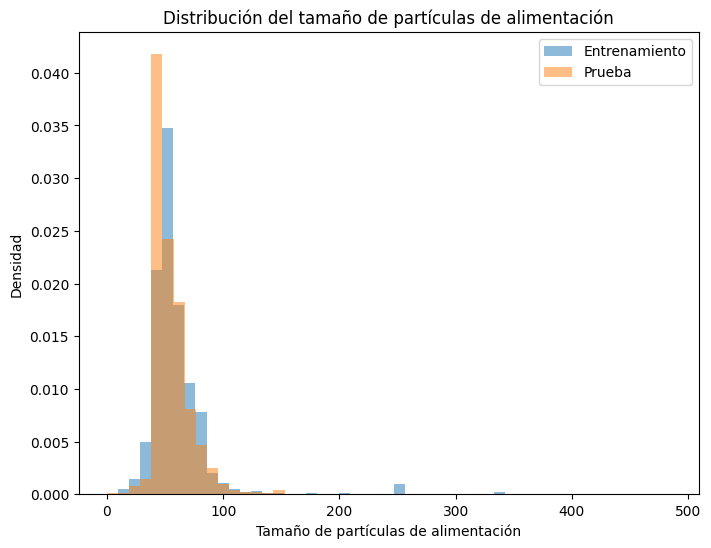

In [26]:
# Graficar las distribuciones de tamaño de partículas de alimentación
plt.figure(figsize=(8, 6))
plt.hist(train_feed_size, bins=50, density=True, alpha=0.5, label='Entrenamiento')
plt.hist(test_feed_size, bins=50, density=True, alpha=0.5, label='Prueba')
plt.xlabel('Tamaño de partículas de alimentación')
plt.ylabel('Densidad')
plt.title('Distribución del tamaño de partículas de alimentación')
plt.legend()
plt.show()

Primero que nada, se decidió utilizar el histograma de densidad porque este es útil para comparar distribuciones de diferentes tamaños de muestra, ya que así, el tamaño no afecta la interpretación. Con esto dicho, se puede observar que las distribuciones son muy similares, por lo que podemos seguir evaluando el modelo sin ningún problema.

# 2.3. Considerando todas las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final, buscar anomalías y eliminarlas si es necesario.

In [27]:
# Sumando todas las concentraciones para el df_train
df_train['input_total'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_au']
df_train ['rougher_total'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_au']
df_train ['final_total'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_au']


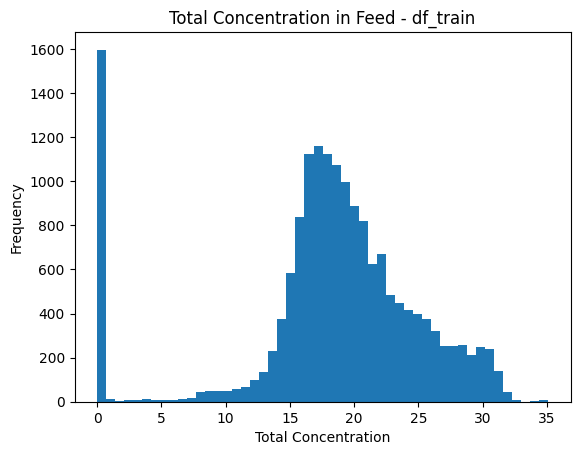

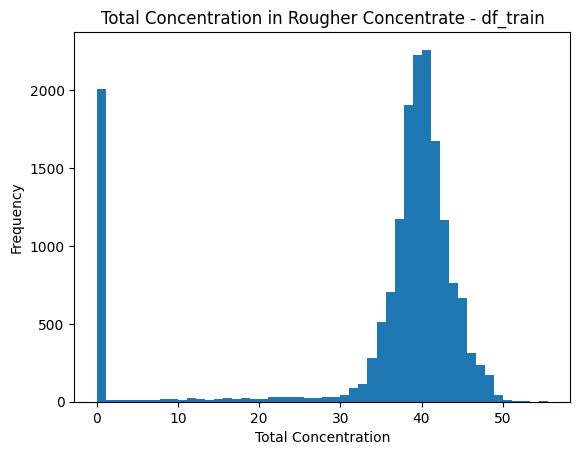

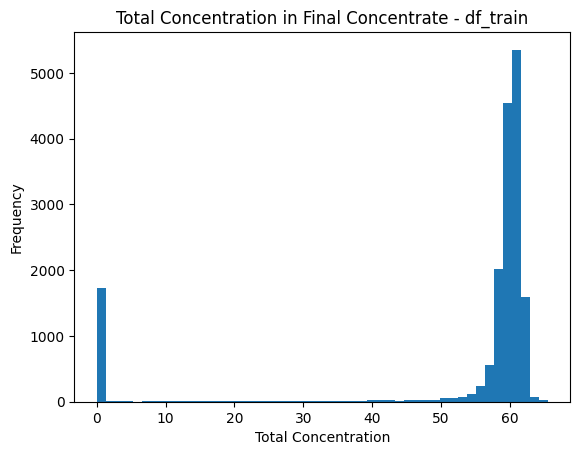

In [28]:
# Creación de histogramas
plt.hist(df_train['input_total'], bins=50)
plt.title('Total Concentration in Feed - df_train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_train['rougher_total'], bins=50)
plt.title('Total Concentration in Rougher Concentrate - df_train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_train['final_total'], bins=50)
plt.title('Total Concentration in Final Concentrate - df_train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

Los 3 gráficos tienen valores atípicos, especificamente en 0 y/o cerca de 0. Lo cual indica que tal vez hay un error de medición o que es parte del proceso, sería adecuado entender mejor el proceso de extracción de oro. En este caso, se van a eliminar esos valores atípicos.

In [29]:
# Eliminar outliers
df_train = df_train[(df_train['input_total'] > 7) & 
                    (df_train['rougher_total'] > 7) & 
                    (df_train['final_total'] > 7)]

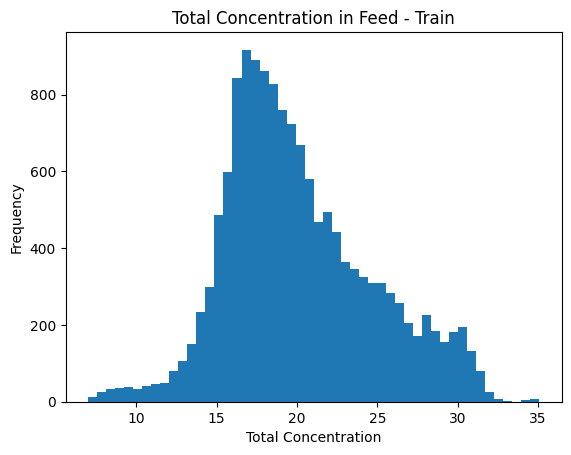

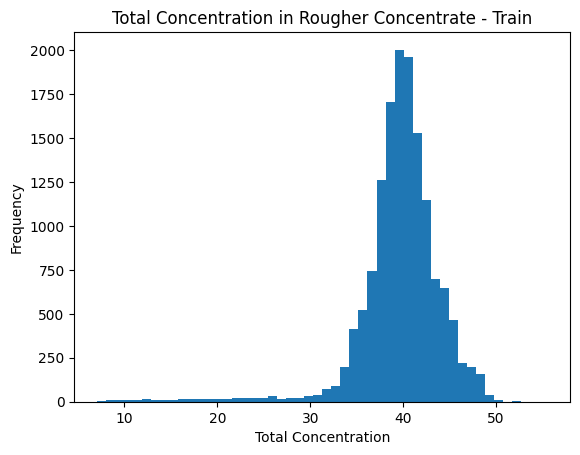

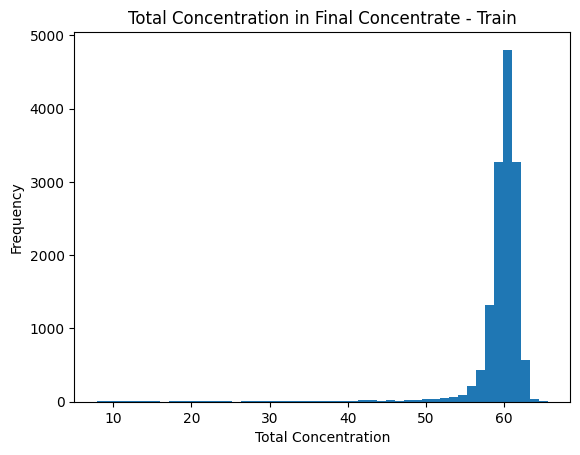

In [30]:
# Histogramas sin outliers
plt.hist(df_train['input_total'], bins=50)
plt.title('Total Concentration in Feed - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_train['rougher_total'], bins=50)
plt.title('Total Concentration in Rougher Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_train['final_total'], bins=50)
plt.title('Total Concentration in Final Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

Ahora las distribuciones no tienen esos outliers tan pronunciados 

# 3. Construye el modelo

In [31]:
# Colocamos las dos columnas a predecir desde el df_full al dt_test
print(df_test.shape)
df_test = df_test.merge(df_full[['date','rougher.output.recovery','final.output.recovery']],
             how='left',on='date')
print(df_test.shape)

(5856, 53)
(5856, 55)


In [32]:
# Cuadramos los df
df_train = df_train[df_test.columns]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14518 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14518 non-null  object 
 1   primary_cleaner.input.sulfate               14518 non-null  float64
 2   primary_cleaner.input.depressant            14518 non-null  float64
 3   primary_cleaner.input.feed_size             14518 non-null  float64
 4   primary_cleaner.input.xanthate              14518 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14518 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14518 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14518 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14518 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14518 non-null  float64
 10  primary_cl

# 3.1. Escribe una función para calcular el valor final de sMAPE.

In [33]:
def smape(y_real, y_pred):
    return (100 / len(y_real)) * np.sum((np.abs(y_real - y_pred)) / ((np.abs(y_real) + np.abs(y_pred)) / 2))

def smape_final(y_real,y_pred):
    y_rougher = y_real.iloc[:,0]
    y_pred_rougher = y_pred[:,0] 
    
    y_final = y_real.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = smape(y_rougher,y_pred_rougher)
    smape_final = smape(y_final,y_pred_final)
    
    return(0.25*smape_rougher + 0.75*smape_final)

smape_scorer = make_scorer(smape_final)

# 3.2. Entrenamiento de modelos y elección del mejor utilizando la muestra de prueba con uso de validación cruzada. 

In [34]:
# Eliminación de datos infinitos, en caso de que existan en el df
df_train = df_train.replace([np.inf, -np.inf], np.nan)
df_train = df_train.dropna()

In [35]:
# División en objetivo y características
target = ['rougher.output.recovery','final.output.recovery']
target_train = df_train[target].reset_index(drop = True)
features_train = df_train.drop(target, axis = 1)
features_train = features_train.drop(['date'], axis = 1)

In [36]:
# Regresión lineal para rougher y final 
lr_model = LinearRegression()
lr_score = cross_val_score(lr_model, features_train, target_train, scoring=smape_scorer, cv=5)
lr_final_score = lr_score.mean()
print('sMAPE para cada iteración', lr_score)
print('Modelo de  regresión lineal | sMAPE ={:.6f}'.format(lr_final_score))

sMAPE para cada iteración [12.9372778   9.37029941  9.12710163  8.77524895 13.7043302 ]
Modelo de  regresión lineal | sMAPE =10.782852


In [37]:
# Bosque aleatorio para rougher y final 
rfr_model = RandomForestRegressor(random_state=12345)
rfr_score = cross_val_score(rfr_model, features_train, target_train, scoring=smape_scorer, cv=5)
rfr_final_score = rfr_score.mean()
print('sMAPE para cada iteración', rfr_score)
print('Modelo de  regresión lineal | sMAPE ={:.6f}'.format(rfr_final_score))

sMAPE para cada iteración [10.53732686  9.19354887  9.18615058 10.06433518 11.45670004]
Modelo de  regresión lineal | sMAPE =10.087612
